In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

## The goal of Gaussian elimination is to produce a solution for a system of equations of the form:

<center>$A\vec{x} = \vec{b}$</center>

In [2]:
def matrix_elimination(A, b):
    '''
    This function is for gaussian elimination. A matrix M of nxn size and a vector 
    of nx1 size is passed into the function. This function works for any nxn matrix
    with real elements.
    '''
    
    # Does a horizontal stack with matrix A an vector b. This is the Augmented matrix
    M = np.hstack((A, b.reshape((b.shape[0],1)))).astype(float)

    # Forward elimination
    for i in range(0, len(M)-1):
        # Gets the pivot
        pivot = M[i][i]
            
        for j in range(i+1, len(M)):
            # Computes for the multiplier
            multiplier = M[j][i] / pivot
            M[j] = multiplier*M[i] - M[j]
                
    # REF is an upper triangular matrix
    REF = M.copy()
    
    # If the i,ith item (belonging in the diagonal) is not 1, we make it 1 
    for i in range(0, len(M)):
        M[i] = M[i] * (1/M[i][i])
        
    # Reduced REF
    RREF = M.copy()
    
    # Back substitution
    for i in range(0, len(M)-1):
        for j in range(i+1, len(M)):
            M[i] = M[i] - M[i][j]*M[j]
                
    A = M[:, 0:len(A)]
    b = M[:, len(A)]
    
    # Returns an identity matrix, solution (b vector), and the REF matrix which is a triangular matrix
    return A, b, REF, RREF

# 2x2 case

In [3]:
A = np.array([[1, -2],
              [3,  2]])

b = np.array([1,11])

A, b, REF, RREF = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')
print("REF = \n", REF, end='\n\n')
print("RREF = \n", RREF)

A = 
 [[ 1.  0.]
 [-0.  1.]]

b = 
 [3. 1.]

REF = 
 [[ 1. -2.  1.]
 [ 0. -8. -8.]]

RREF = 
 [[ 1. -2.  1.]
 [-0.  1.  1.]]


In [4]:
A = np.array([[5, -2],
              [3,  12]])

b = np.array([1,11])

A, b, REF, RREF = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')
print("REF = \n", REF, end='\n\n')
print("RREF = \n", RREF)

A = 
 [[ 1.  0.]
 [-0.  1.]]

b = 
 [0.51515152 0.78787879]

REF = 
 [[  5.   -2.    1. ]
 [  0.  -13.2 -10.4]]

RREF = 
 [[ 1.         -0.4         0.2       ]
 [-0.          1.          0.78787879]]


### Visualizing the problem

<IPython.core.display.Javascript object>


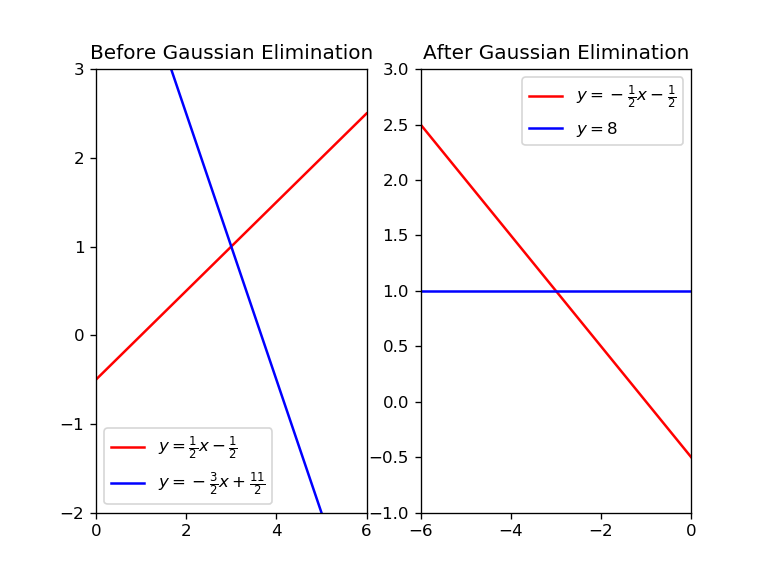

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'After Gaussian Elimination')

In [5]:
plt.subplot(1,2,1)

# Before gaussian elimination
ax1 = plt.subplot(1, 2, 1)

x = np.linspace(-1,6)
y1 = (x/2) - 0.5
y2 = (11/2) - (3*x/2)

ax1.plot(x, y1, color='r', label=r'$y=\frac{1}{2}x -\frac{1}{2}$')
ax1.plot(x, y2, color='b', label=r'$y=-\frac{3}{2}x +\frac{11}{2}$')
ax1.set_xlim(0,6)
ax1.set_ylim(-2,3)
ax1.legend()
ax1.set_title("Before Gaussian Elimination")

# Gaussian elimination
ax2=plt.subplot(1, 2, 2)

x = np.linspace(-6,0)
y12 = (-x/2) - 0.5
y22 = [1]*len(x)

ax2.plot(x, y12, color='r', label=r'$y=-\frac{1}{2}x-\frac{1}{2}$')
ax2.plot(x, y22, color='b', label=r'$y=8$')
ax2.set_xlim(-6,0)
ax2.set_ylim(-1,3)
ax2.legend()
ax2.set_title("After Gaussian Elimination")

# 3x3 case

In [6]:
A = np.array([[2, 4, -2],
              [4, 9, -3],
              [-2,-3, 7]])

b = np.array([2, 8, 10])

A, b, REF, RREF = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')
print("REF = \n", REF, end='\n\n')
print("RREF = \n", RREF)

A = 
 [[ 1.  0.  0.]
 [-0.  1.  0.]
 [ 0.  0.  1.]]

b = 
 [-1.  2.  2.]

REF = 
 [[ 2.  4. -2.  2.]
 [ 0. -1. -1. -4.]
 [ 0.  0.  4.  8.]]

RREF = 
 [[ 1.  2. -1.  1.]
 [-0.  1.  1.  4.]
 [ 0.  0.  1.  2.]]


In [7]:
A = np.array([[1, 1, 1],
              [1, 2, 2],
              [1, 2, 3]])

b = np.array([6, 9, 10])

A, b, REF, RREF = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')
print("REF = \n", REF, end='\n\n')
print("RREF = \n", RREF)

A = 
 [[ 1.  0.  0.]
 [-0.  1.  0.]
 [ 0.  0.  1.]]

b = 
 [3. 2. 1.]

REF = 
 [[ 1.  1.  1.  6.]
 [ 0. -1. -1. -3.]
 [ 0.  0.  1.  1.]]

RREF = 
 [[ 1.  1.  1.  6.]
 [-0.  1.  1.  3.]
 [ 0.  0.  1.  1.]]


# Random matrices

In [8]:
A = np.random.rand(2,2)
b = np.random.rand(2)

A, b, REF, RREF = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')
print("REF = \n", REF, end='\n\n')
print("RREF = \n", RREF)

A = 
 [[ 1.  0.]
 [-0.  1.]]

b = 
 [0.50622218 2.66756688]

REF = 
 [[ 0.56585671  0.03910612  0.39076741]
 [ 0.         -0.15828625 -0.42223916]]

RREF = 
 [[ 1.          0.06910958  0.69057661]
 [-0.          1.          2.66756688]]


# 100x100 matrix

In [9]:
A = np.random.rand(100,100)
b = np.random.rand(100)

A, b, REF, RREF = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')
print("REF = \n", REF, end='\n\n')
print("RREF = \n", RREF)

A = 
 [[ 1.00000000e+00 -4.79003985e-16  3.28110313e-16 ...  0.00000000e+00
  -1.16654547e-16  0.00000000e+00]
 [-3.09589250e-16  1.00000000e+00 -2.45713154e-16 ...  0.00000000e+00
   6.03001485e-17  0.00000000e+00]
 [-3.04142743e-16  2.15870160e-16  1.00000000e+00 ...  0.00000000e+00
   5.44232636e-17  0.00000000e+00]
 ...
 [ 2.59708077e-17 -8.94956834e-17  6.99551454e-17 ...  1.00000000e+00
  -2.47627017e-17  0.00000000e+00]
 [ 2.86781219e-17 -2.46179807e-16  9.21326332e-17 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 7.43212357e-17  1.16953752e-16 -2.92279188e-17 ... -0.00000000e+00
  -7.30369575e-17  1.00000000e+00]]

b = 
 [ 4.98925926 -4.02876053 -4.42320672 -3.46966358  3.80174109 -4.60945171
  3.23098956 -1.07928803  1.60997105 -0.70475464  2.58898753  1.14371983
  9.61871769 -0.12107824 -1.46439314  2.57881754  2.91471577 -1.06633935
  1.18248994  1.17633064  4.40858219  3.44712761 -1.88619881 -4.06646673
 -3.06507881 -1.80437152 -3.43399183  1.28423331 -0.6760634

### Feeding an upper triangular matrix

In [10]:
A = np.array([[1,1,0], 
              [0,1,1], 
              [0,0,1]])

b = np.array([3, 5, 2])

A, b, REF, RREF = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')
print("REF = \n", REF, end='\n\n')
print("RREF = \n", RREF)

A = 
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]

b = 
 [0. 3. 2.]

REF = 
 [[ 1.  1.  0.  3.]
 [ 0. -1. -1. -5.]
 [-0.  0.  1.  2.]]

RREF = 
 [[ 1.  1.  0.  3.]
 [-0.  1.  1.  5.]
 [-0.  0.  1.  2.]]


#### Our function works well with upper triangular matrices

### Feeding a lower triangular matrix

In [11]:
A = np.array([[1,0,0], 
              [1,1,0], 
              [1,1,1]])

b = np.array([2, 5, 3.2])

A, b, REF, RREF = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')
print("REF = \n", REF, end='\n\n')
print("RREF = \n", RREF)

A = 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

b = 
 [ 2.   3.  -1.8]

REF = 
 [[ 1.   0.   0.   2. ]
 [ 0.  -1.   0.  -3. ]
 [ 0.   0.   1.  -1.8]]

RREF = 
 [[ 1.   0.   0.   2. ]
 [-0.   1.  -0.   3. ]
 [ 0.   0.   1.  -1.8]]


#### Our function also does well when we feed it a lower triangular matrix.

# Cases where elimination fails

### I. No solution

$x-2y=1$<br>
$3x-6y=11$

In [12]:
x = np.linspace(-3, 3)

y1 = x/2 - 0.5
y2 = x/2 - (11/6)

<IPython.core.display.Javascript object>


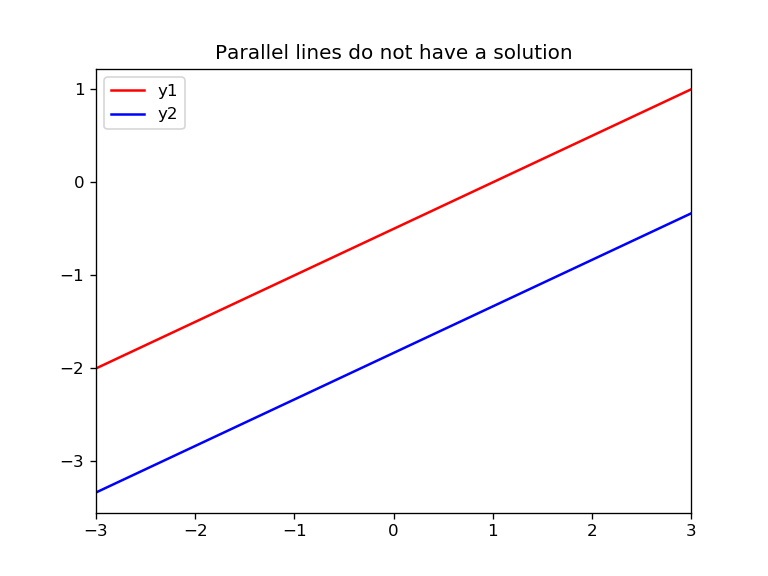

In [13]:
plt.figure()

plt.plot(x, y1, color='r', label='y1')
plt.plot(x, y2, color='b', label='y2')
plt.xlim(-3,3)
plt.title('Parallel lines do not have a solution')
plt.legend()

### Testing it out

In [14]:
A = np.array([[1, -2],
              [3, -6]])

b = np.array([1, 11])

A, b, REF, RREF = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')
print("REF = \n", REF, end='\n\n')
print("RREF = \n", RREF) # Our program encounters division by zero errors

A = 
 [[nan nan]
 [nan nan]]

b = 
 [-inf -inf]

REF = 
 [[ 1. -2.  1.]
 [ 0.  0. -8.]]

RREF = 
 [[  1.  -2.   1.]
 [ nan  nan -inf]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


### II. Infinitely many solutions

$x-2y=1$<br>
$3x-6y=3$

<IPython.core.display.Javascript object>


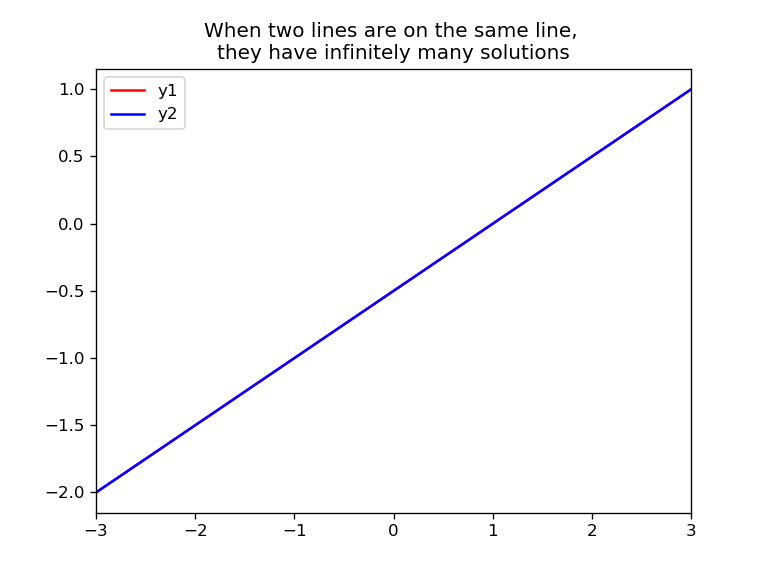

In [15]:
x = np.linspace(-3, 3)

y1 = x/2 - 0.5
y2 = x/2 - 0.5

plt.figure()

plt.plot(x, y1, color='r', label='y1')
plt.plot(x, y2, color='b', label='y2')
plt.xlim(-3,3)
plt.title('When two lines are on the same line, \nthey have infinitely many solutions')
plt.legend()

### Testing it out

In [16]:
A = np.array([[1, -2],
              [3, -6]])

b = np.array([1, 3])

A, b, REF, RREF = matrix_elimination(A, b)

print("A = \n", A, end='\n\n')
print("b = \n", b, end='\n\n')
print("REF = \n", REF, end='\n\n')
print("RREF = \n", RREF) # Our program encounters division by zero errors

A = 
 [[nan nan]
 [nan nan]]

b = 
 [nan nan]

REF = 
 [[ 1. -2.  1.]
 [ 0.  0.  0.]]

RREF = 
 [[ 1. -2.  1.]
 [nan nan nan]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


# Elimination using Elementary matrices

In [17]:
def elementary_matrix_elimination(A, b):
    '''
    This function does matrix elimination by the use of elementary matrices.
    Returns an upper triangular matrix U and the Eb vector. Works only for nxn 
    matrices with real elements.
    '''

    EA = A.copy()
    Eb = b.copy()
    matrix_len = len(EA)
    
    for i in range(0, matrix_len-1):
        # Selects the pivot
        pivot = EA[i][i]
        
        for j in range(1+i, matrix_len):
            # Creates the elementary matrix with a -l (difference element)
            elementary_matrix = np.diag(np.ones(matrix_len))
            elementary_matrix[j][i] = -EA[j][i]/pivot
            
            # Multiplies the elementary matrix to A and b
            EA = elementary_matrix @ EA
            Eb = elementary_matrix @ Eb
    
    U = EA
    return U, Eb

# Examples

In [18]:
A = np.array([[2,4,-2],
              [4,9,-3],
              [-2,-3,7]])

b = np.array([2,8,10])

elementary_matrix_elimination(A, b)

(array([[ 2.,  4., -2.],
        [ 0.,  1.,  1.],
        [ 0.,  0.,  4.]]), array([2., 4., 8.]))

In [19]:
A = np.array([[1,1,1],
              [1,2,2],
              [1,2,3]])

b = np.array([6,9,10])

elementary_matrix_elimination(A, b)

(array([[1., 1., 1.],
        [0., 1., 1.],
        [0., 0., 1.]]), array([6., 3., 1.]))

### We can now do back substitution to solve the system of equations